In [22]:
import seaborn as sns #Plotting library
import pandas as pd 
import matplotlib.pyplot as plt #We need Matplotlib for setting the labels in the Seaborn graphs
import math
from sklearn.linear_model import LinearRegression #This is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Data Cleaning

In [57]:
df1 = pd.read_csv('steps.csv', delimiter= ";"  )
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df2 = pd.read_csv('survey.csv').dropna()
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [59]:
df = pd.merge(df1, df2, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 925
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


Now we're going to create the variable mean steps per participant: 

In [61]:
df['mean'] = df.iloc[0:,5:337].mean(axis=1)
df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9965.650888
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5552.321212
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8069.926174
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3038.500000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4949.827586


# Exploratory Data Analysis
### Week 1

First I am going to explore the data:

/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


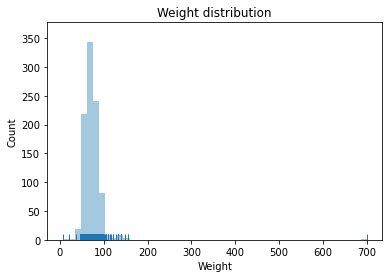

In [62]:
sns.distplot(df['weight'].dropna(), kde=False, rug=True) #SI need to drop the NA's for the plot
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

Count above 200 seems like it does not check out, so I make sure those values are not in there anymore.

In [63]:
def above_200(x):
    if(x > 200): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(above_200)

Done.

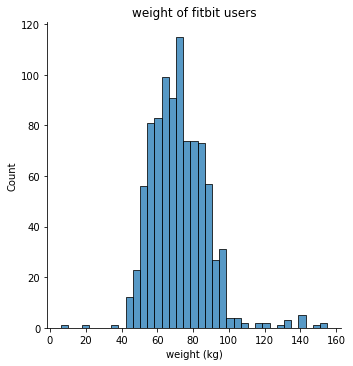

In [64]:
sns.displot(df['weight'].dropna(), kde=False) 
plt.title('weight of fitbit users')
plt.xlabel('weight (kg)')
plt.ylabel('Count')
plt.show()

In [65]:
def under_45(x):
    if(x < 45): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(under_45)

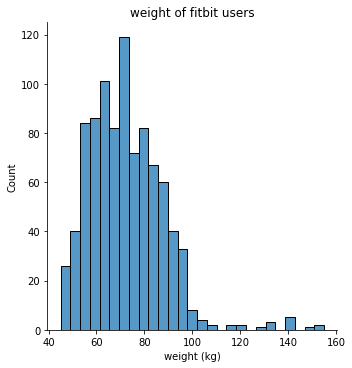

In [66]:
sns.displot(df['weight'].dropna(), kde=False) 
plt.title('weight of fitbit users')
plt.xlabel('weight (kg)')
plt.ylabel('Count')
plt.show()

Here we see that most of the fitbit users weigh between 45 and 95 kg's.

Let's plot the mean steps per participant:

/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


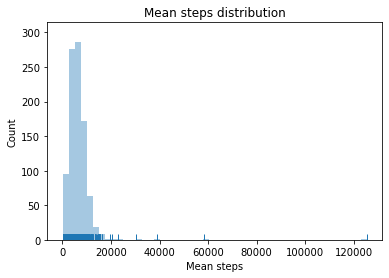

In [67]:
sns.distplot(df['mean'].dropna(), kde=False, rug=True) #I need to drop the NA's for the plot
plt.title('Mean steps distribution')
plt.xlabel('Mean steps')
plt.ylabel('Count')
plt.show()

In the graph above, we see the mean steps per person. However, there are some outliers that make the data difficult to read. Which is why there will also be a graph, that excludes outliers.  

The median steps per person is: 5790.984496124031
The mean steps per person: 6136.127736677308


/Users/evadorpmans/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


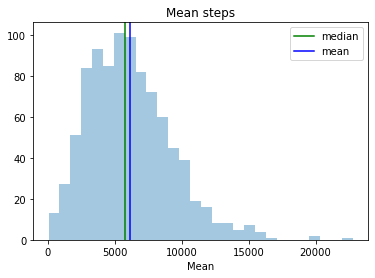

In [68]:
def above_30000(x):
    if(x > 30000): 
        return float('NaN')
    else: 
        return x
    
df['mean'] = df['mean'].apply(above_30000)

mean_size = df['mean'].mean()
median_size = df['mean'].median()

print(f'The median steps per person is: {median_size}')
print(f'The mean steps per person: {mean_size}')

df['mean'].name = 'Mean' #Labeling the variable for plotting
mean_steps = df['mean'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(mean_steps, kde=False) 
plt.title('Mean steps')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() 
plt.show()

In this graph (above) we see that the median and the mean are not that far apart from each other. However, what we also see is that there are still some outliers that have a lot more steps, even though I already got rid of > 30.000 steps. However, it is not impossible so I will keep the graph as is.

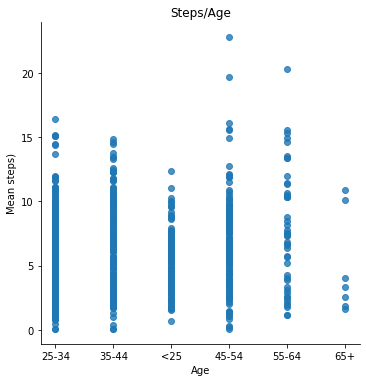

In [69]:
df['mean'] = df['mean']/ 1000 #get subscribers in millions
df['age'] = df['age']

sns.lmplot(x='age', y='mean', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Age') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps)')
plt.title('Steps/Age')
plt.show()

In this plot we see multiple things: first of all we see that 65+ is the age where the mean step per participant differs the most. In age 45-54 we see that there are the most outliers. Age <25 to 44, the mean step per participant is the most consistent. 

## A new variable is going to be added to the dataframe: BMI.

In [70]:
df['BMI'] = df['weight'] / (df['height']* df['height'])*10000
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9.965651,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5.552321,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8.069926,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3.038500,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4.949828,21.872423


# Going deeper into Exploratory data analysis

Just to check if there really was no correlation, I made a correlation matrix. The matrix also shows there is no real correlation. 

The BMI has been added, and next we see the new correlation table. We see that the weight has the biggest correlation with the BMI. Besides correlations between weight, height and BMI there are no other big correlations. There is no real correlation shown with the mean steps.

In [71]:
df1 = df[['mean', 'id', 'weight', 'height', 'BMI']].corr()
df1.head()

,mean,id,weight,height,BMI
mean,1.000000,0.037304,-0.068601,-0.069812,-0.041726
id,0.037304,1.000000,0.009195,0.030308,-0.003790
weight,-0.068601,0.009195,1.000000,0.508194,0.866354
height,-0.069812,0.030308,0.508194,1.000000,0.020076
BMI,-0.041726,-0.003790,0.866354,0.020076,1.000000


The scatterplot:

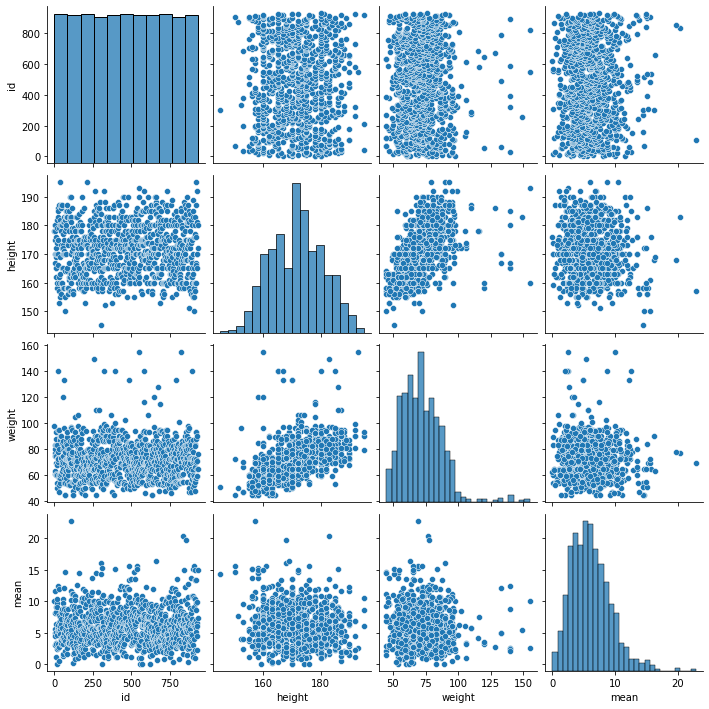

In [72]:
df_subset = df[["id", "gender","age","height","weight","mean"]]
sns.pairplot(df_subset)
plt.show()

In [73]:
df_subset.corr()

,id,height,weight,mean
id,1.000000,0.030308,0.009195,0.037304
height,0.030308,1.000000,0.508194,-0.069812
weight,0.009195,0.508194,1.000000,-0.068601
mean,0.037304,-0.069812,-0.068601,1.000000


There is no real correlation to find with the mean of the steps.

# Predictive model

Linear regression: how I understand it, is that linear regression predicts "something". It predicts a dependent variable, based on a independent variable. The dependent variable is always the Y and the indepedent is the X. That basically means that a linear regression finds a linear relationship between x and y. 

### Predictive model
Dummy variables.
I created the dummy variables but am not sure what to do with those.

This step I still really struggled with. I used Google and eventually also looked at the solution.

In [74]:
education_1_dummies = pd.get_dummies(df['education_1'])
df = pd.concat([df, education_1_dummies], axis=1) 

age_dummies = pd.get_dummies(df['age'])
df = pd.concat([df, age_dummies], axis=1) 

gender_dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, gender_dummies], axis=1) 

df.drop(df.loc[:,'20-6-2013':'13-5-2014'], inplace=True, axis=1)
df

,id,city,gender,age,hh_size,education,education_1,height,weight,mean,...,Primary,Vocational,25-34,35-44,45-54,55-64,65+,<25,Female,Male
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9.965651,...,0,0,1,0,0,0,0,0,0,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5.552321,...,0,0,0,1,0,0,0,0,0,1
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8.069926,...,0,0,1,0,0,0,0,0,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3.038500,...,0,0,0,0,0,0,0,1,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4.949828,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,5.988739,...,0,0,0,0,1,0,0,0,1,0
922,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4.449704,...,0,0,0,0,0,0,0,1,0,1
923,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,9.879087,...,0,0,0,1,0,0,0,0,0,1
924,928,Lille,Female,55-64,1,1,High school,172.0,65.0,14.958048,...,0,0,0,0,0,1,0,0,1,0


In [75]:
corr = df.corr()
corr["mean"] #This gets the relevant column from the correlations

id                     0.037304
hh_size                0.038996
education              0.024439
height                -0.069812
weight                -0.068601
mean                   1.000000
BMI                   -0.041726
Bachelor              -0.010275
High school            0.054450
Master or doctorate   -0.002742
No degree              0.004544
Primary               -0.011680
Vocational            -0.047644
25-34                 -0.051071
35-44                  0.050927
45-54                  0.059268
55-64                  0.120791
65+                   -0.034500
<25                   -0.116708
Female                 0.061076
Male                  -0.061076
Name: mean, dtype: float64

## Building the model

Test & train data

What I did the firs time when I submitted the assignment was this: 

In [76]:
# def train_test_fun(percentage_train, df):
#     len_train = round(percentage_train*len(df))
#     train_data=df[0:len_train]
#     test_data=df[len_train:len(df)]
#     return train_data, test_data

In [77]:
# train_data, test_data = train_test_fun(0.75, df)

But the feedback was that it's useful practice to build one yourself - however this one isn't random.

# Note for Jonas: 
## For some reason I cannot get this step to work. I did get the test-train data to work for assignment 2, but I keep getting errors for this one. I have no idea why. That is why I continued with this assignment, saying what I would've predicted next and what the outcome would mean.

In [86]:
y = df['mean']
X = df[['height', 'weight', 'Bachelor', 'High school', 'Master or doctorate', 'Primary', 'Vocational', '25-34', '35-44', '45-54', '55-64', '65+', 'Male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test).dropna() #Generate predictions for the test data. So we use X.test, not X.train
X_train.head().dropna() #The train data

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Evaluation Data

In [ ]:
r2_score(y_test, y_test_p)

This line would give me the r2 score. The R2 score would predict the mean, which would show a percentage on if the model could predict the mean steps per person. 

In [ ]:
math.sqrt(mean_squared_error(y_test, y_test_p))

This line would give me the RSME score. I would continue to predict the RSME score, which would give an indication if the model would predict correctly or not. 

# Conclusion

I asked another student for help on the test/train data, but both of us could not get it to work. So, for the conclusion I looked at her code and saw that the prediction model does not work well for this data set. The correlations are too low, and the mean step per participant cannot be predicted.